# EDA Assignment

---

**EDA Project Instructions**

1. **Read Each Task Carefully**: Understand each task’s requirements before starting your analysis.

2. **Perform the Analysis**: For each task, you’ll find a description in the code cell. Write your code directly in the provided cells to perform the necessary analysis using the Heart Attack dataset.

3. **Visualize and Interpret**: Create visualizations and interpret the results as needed. Ensure your analysis addresses the specific questions and insights required.

4. **Complete All Tasks**: Make sure you address each task. Each task is designed to test different aspects of data analysis and visualization.

5. **Download Your Notebook**: After completing and reviewing your analysis, download your notebook file (.ipynb) by selecting `File > Download > Download .ipynb`.

6. **Submit Your Work**: Upload the downloaded `.ipynb` file to the designated platform for submission.

7. **Verify Your Submission**: Ensure that you have submitted the correct file and that it is not corrupted. If needed, resubmit the file.

Good luck, and happy analyzing!

---

## Dataset Information :
<ul style= "color:#137667;
            font-size:12px;">
    <li> age : age of the patient</li>
    <li> sex : sex of the patient (0 - Male, 1 - Female)</li>
    <li> cp : Chest Pain type</li>
    0: typical angina <br>
    1: atypical angina <br>
    2: non-anginal pain <br>
    3: asymptomatic <br>
    <li> trtbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> rest_ecg : resting electrocardiographic results</li>
  0:normal <br>
  1:having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of>0.05 mV) <br>
  2:showing probable or definite left ventricular hypertrophy by Estes' criteria
    <li> thalachh : maximum heart rate achieved</li>
    <li> exng : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : ST/HR Slope </li>
    <li> caa : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> output : 0= less chance of heart attack 1= more chance of heart attack</li>
</ul>

In [4]:
# Run this code cell for initial setup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
# load the data to colab
data = pd.read_csv('/content/e8697469-fd7e-4605-87fe-db9141da3f5c_heart.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148.0,0.0,0.4,1,0,1,1
6,56,0,1,140,294.0,0,0,153.0,0.0,1.3,1,0,2,1
7,44,1,1,120,263.0,0,1,173.0,0.0,0.0,2,0,3,1
8,52,1,2,172,199.0,1,1,162.0,0.0,0.5,2,0,3,1
9,57,1,2,150,168.0,0,1,174.0,0.0,1.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    int64  
 1   sex       324 non-null    int64  
 2   cp        324 non-null    int64  
 3   trtbps    324 non-null    int64  
 4   chol      321 non-null    float64
 5   fbs       324 non-null    int64  
 6   restecg   324 non-null    int64  
 7   thalachh  320 non-null    float64
 8   exng      321 non-null    float64
 9   oldpeak   324 non-null    float64
 10  slp       324 non-null    int64  
 11  caa       324 non-null    int64  
 12  thall     324 non-null    int64  
 13  output    324 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.6 KB


---
---
**1. Check the presence of duplicate values and deal with them.**

In [8]:
# write your code here
data.duplicated().sum()

22

---
---
**2.Check the presence of missing values and deal with them.**

In [9]:
# write your code here
data.isnull().sum()
# chol column (continuous numerical)
data.dropna(inplace=True)
# thalachh (continuous numerical)
# exng (categorical)
data.isnull().sum()


,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


---
---
**3.Determine mean, standard deviation and quartiles(q1,q2,q3) for following columns:**
   - age
   - trtbps
   - chol
   - thalachh

In [10]:
# write your code here
data[['age','trtbps','chol','thalachh']].describe()

,age,trtbps,chol,thalachh
count,314.000000,314.000000,314.000000,314.000000
mean,54.490446,132.108280,244.821656,149.035032
std,9.042405,17.630601,51.319522,22.939190
min,29.000000,94.000000,126.000000,71.000000
25%,47.250000,120.000000,209.000000,133.000000
50%,56.000000,130.000000,239.000000,152.000000
75%,61.000000,140.000000,274.000000,165.000000
max,77.000000,200.000000,564.000000,202.000000


---
---
**4.Analyse whether males or females are at a higher risk of heart attack.**

In [11]:
# write your code here
data.groupby('sex')['output'].value_counts()

sex  output
0    1          70
     0          29
1    0         130
     1          85
Name: count, dtype: int64

<Axes: xlabel='output', ylabel='count'>

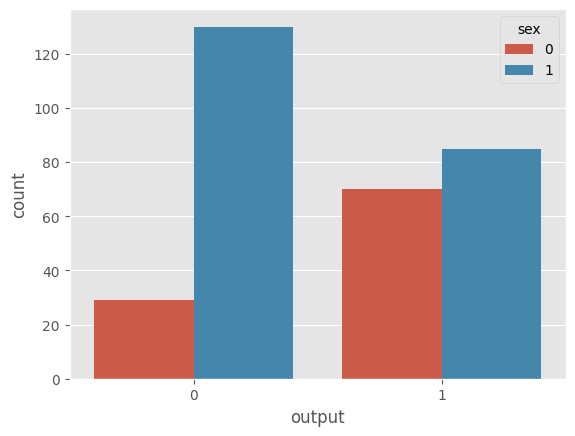

In [12]:
sns.countplot(x='output',hue='sex',data=data)

In [27]:
# Group by sex and target to count occurrences
counts = data.groupby(['sex', 'output']).size().reset_index(name='count')

print(counts)


   sex  output  count
0    0       0     29
1    0       1     70
2    1       0    130
3    1       1     85


In [13]:
svl_rate = data.groupby('sex').output.value_counts(normalize = True)
svl_rate



sex  output
0    1         0.707071
     0         0.292929
1    0         0.604651
     1         0.395349
Name: proportion, dtype: float64

In [14]:
svl_rate[0]

,proportion
output,
1,0.707071
0,0.292929


In [15]:
svl_rate[1]

,proportion
output,
0,0.604651
1,0.395349


In [23]:
print('Percentage of female survivors : ', round(svl_rate[1][0]*100,2))
print('Percentage of dead females     : ', round(svl_rate[1][1]*100,2))
print('Percentage of male survivors   : ', round(svl_rate[0][0]*100,2))
print('Percentage of dead males       : ', round(svl_rate[0][1]*100,2))

Percentage of female survivors :  60.47
Percentage of dead females     :  39.53
Percentage of male survivors   :  29.29
Percentage of dead males       :  70.71


Text(0.5, 1.0, 'Female Survival')

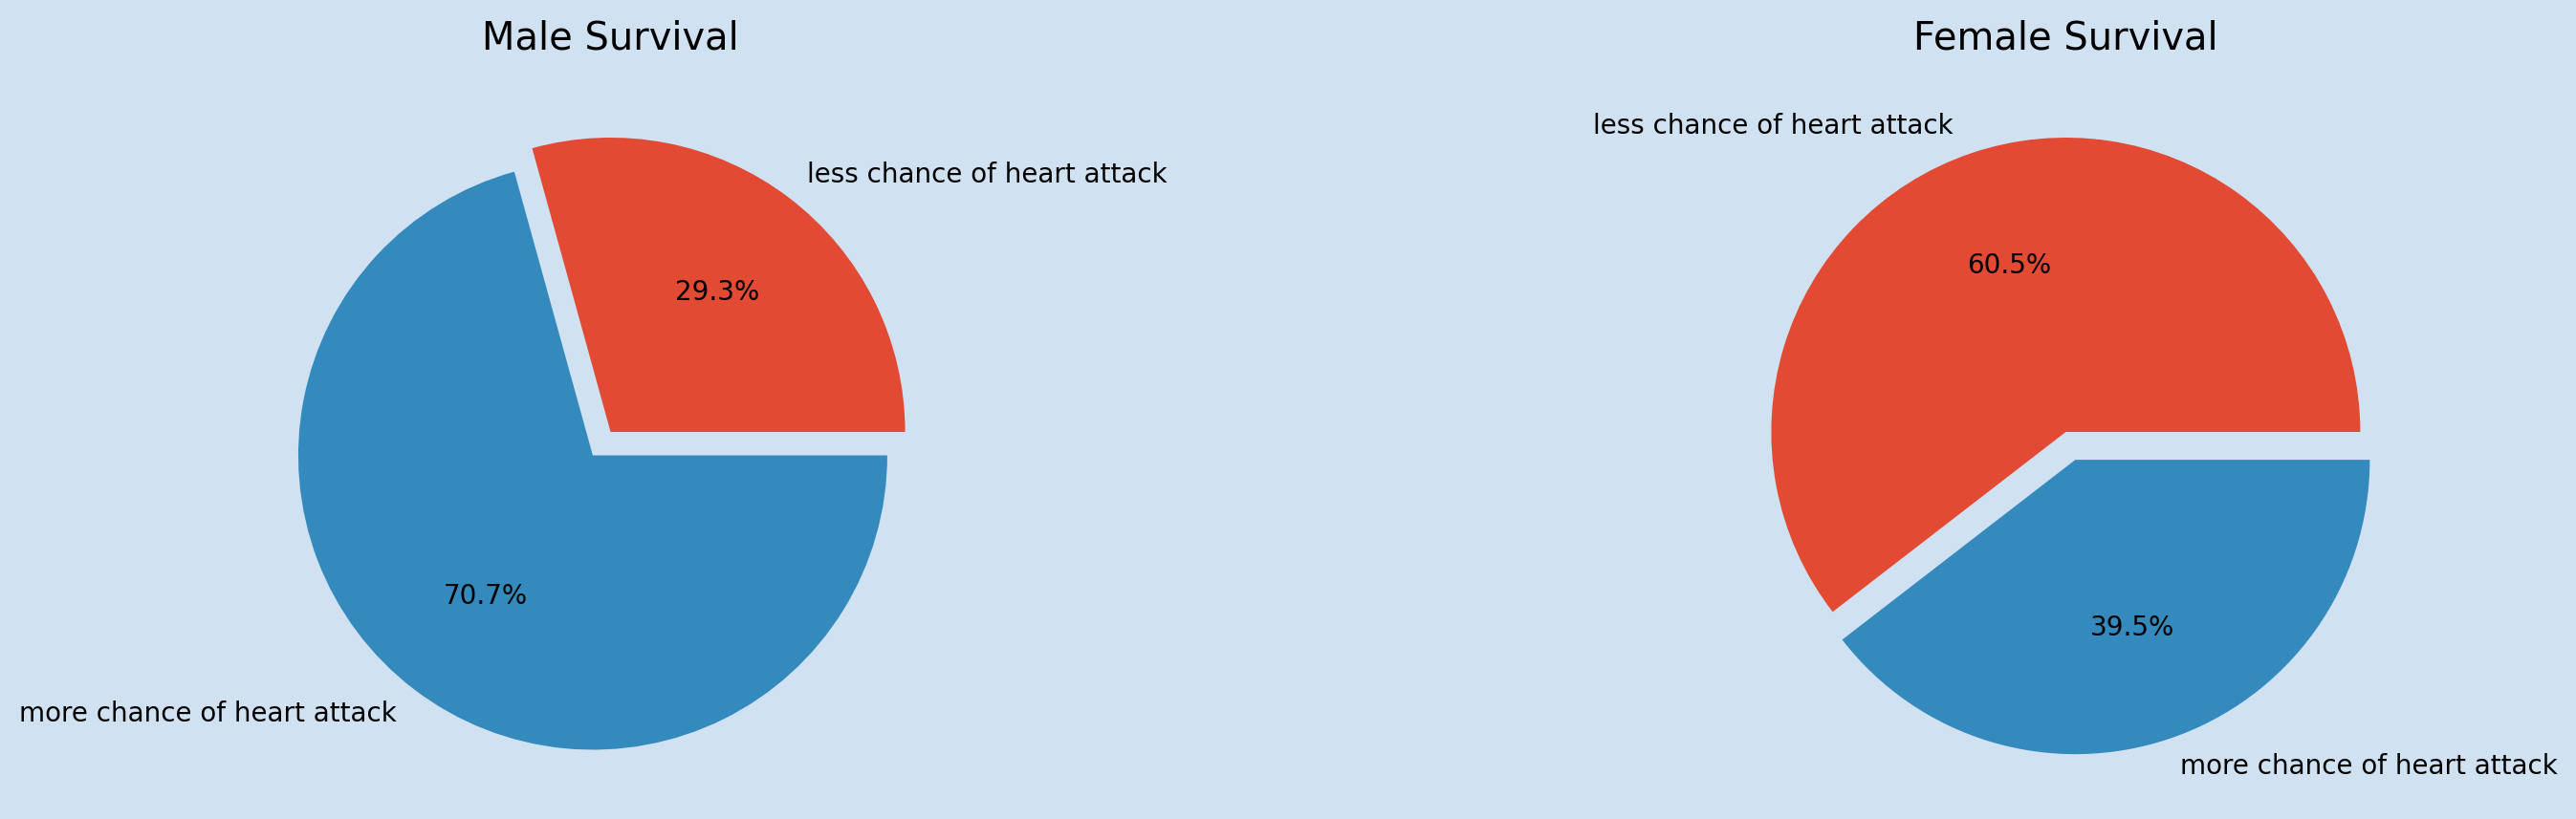

In [29]:

males = svl_rate[0]
females = svl_rate[1]
labels = ['less chance of heart attack ', 'more chance of heart attack']

plt.figure(figsize = (18,5), dpi = 200, facecolor = '#d0e1f2')
plt.subplot(1,2,1)
plt.pie(males, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Male Survival')
plt.subplot(1,2,2)
plt.pie(females, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Female Survival')

**5.Patients with which type of chest pain are at highest risk of heart attack.**

In [18]:
# write your code here
data.groupby('cp')['output'].value_counts()

cp  output
0   0         119
    1          38
1   1          39
    0          11
2   1          65
    0          20
3   1          13
    0           9
Name: count, dtype: int64

<Axes: xlabel='output', ylabel='count'>

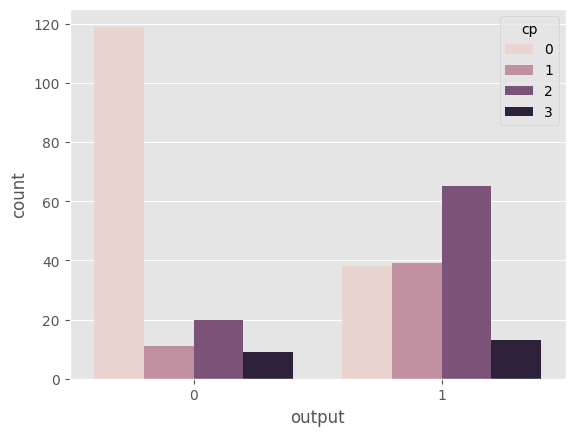

In [20]:
sns.countplot(x='output',hue='cp',data=data)

---
---
**6.Analyse the effect of age on heart attack risk.**

<Axes: xlabel='output', ylabel='age'>

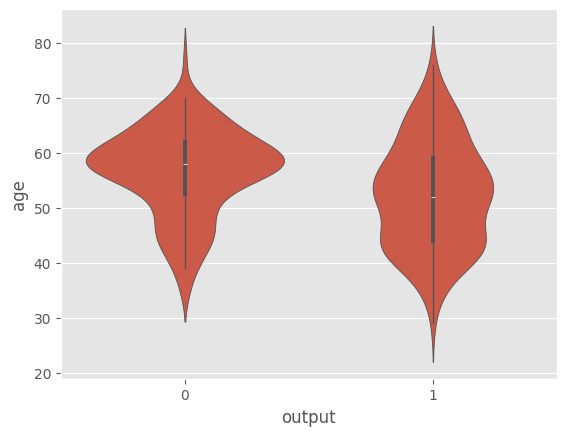

In [22]:
# write your code here
sns.violinplot(x='output',y='age',data=data)

<Axes: xlabel='output', ylabel='age'>

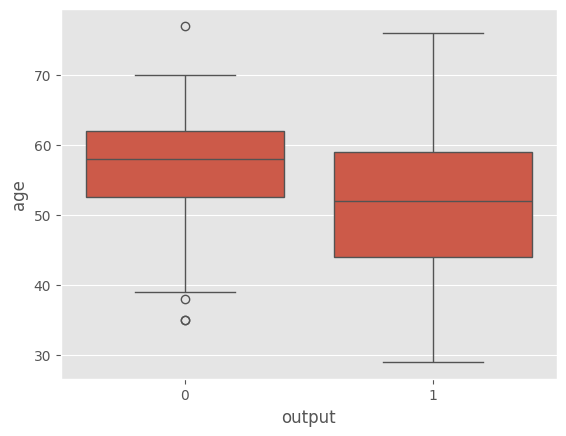

In [23]:
sns.boxplot(x='output',y='age',data=data)

---
---
**7.A higher risk of heart attack is associated more with low fasting blood sugar levels or high fasting blood sugar levels.**

<Axes: xlabel='output', ylabel='count'>

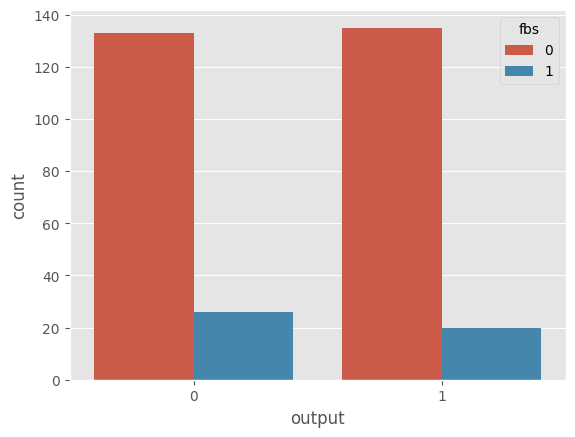

In [24]:
# write your code here
sns.countplot(x='output',hue='fbs',data=data)

---
---
**8.How the risk of heart atack can be determined from resting electrocardiographic results?**

<Axes: xlabel='output', ylabel='count'>

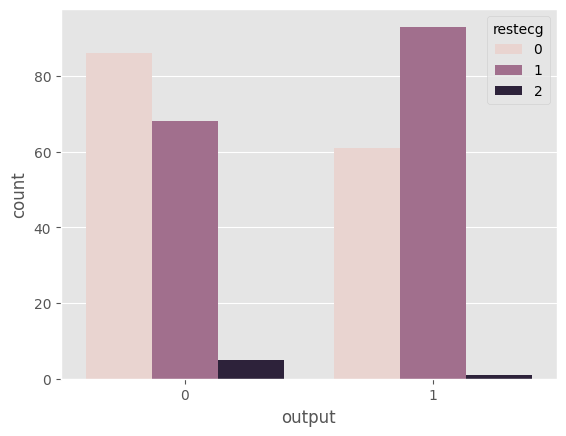

In [26]:
# write your code here
sns.countplot(x='output',hue='restecg',data=data)

---
---
**9. Is resting blood presure a significant factor for detrmining risk of a heart attack?**

<Axes: xlabel='output', ylabel='trtbps'>

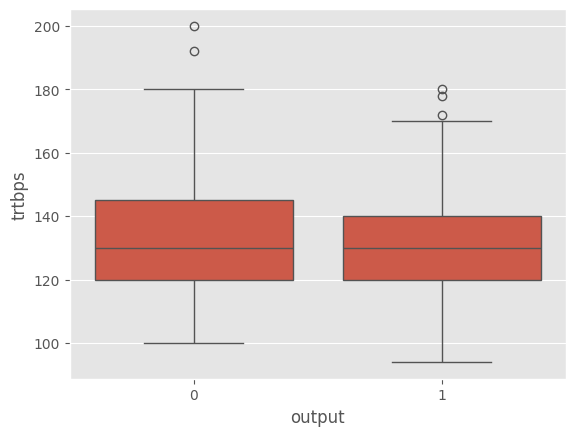

In [30]:
# write your code here
sns.boxplot(x='output',y='trtbps',data=data)

---
---
**10.Is heart attack risk asociated with a higher heart rate?**

<Axes: xlabel='output', ylabel='thalachh'>

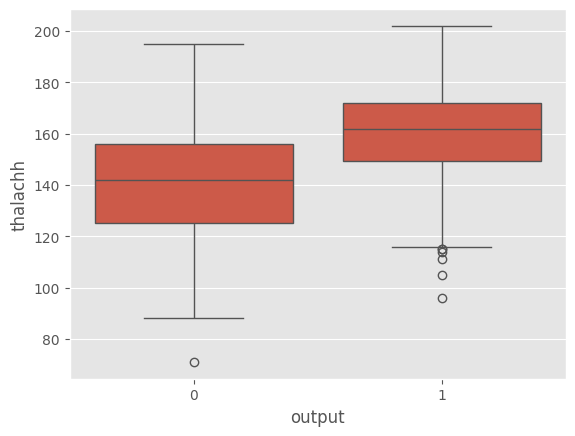

In [31]:
# write your code here
sns.boxplot(x='output',y='thalachh',data=data)

---
---
**11. Determine whether ST/HR (ST segment and Heart rate ratio) is a singificant factor in determining heart attack risk.**

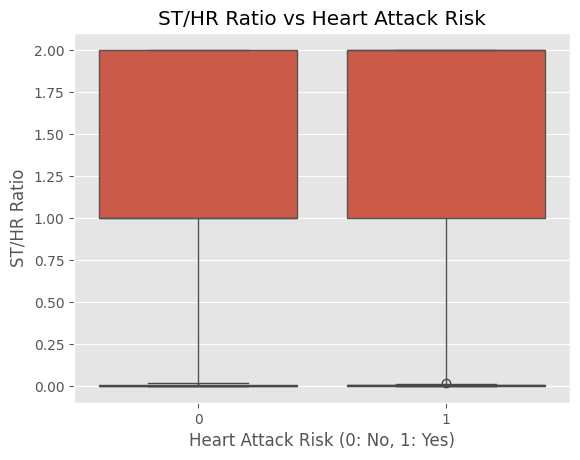

In [35]:
# write your code here
sns.boxplot(x='output',y='slp',data=data)
data['ST_HR'] = data['restecg'] / data['thalachh']


import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='output', y='ST_HR', data=data)
plt.xlabel('Heart Attack Risk (0: No, 1: Yes)')
plt.ylabel('ST/HR Ratio')
plt.title('ST/HR Ratio vs Heart Attack Risk')
plt.show()


In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

# Load dataset (replace the URL or path with your actual dataset)
df = pd.read_csv('/content/e8697469-fd7e-4605-87fe-db9141da3f5c_heart.csv')  # Replace with your dataset path

# Function to create plots based on user selection
def plot_relationship(x_column, y_column, plot_type):
    plt.figure(figsize=(8, 6))

    if plot_type == 'Scatter Plot':
        sns.scatterplot(data=df, x=x_column, y=y_column)
        plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    elif plot_type == 'Line Plot':
        sns.lineplot(data=df, x=x_column, y=y_column)
        plt.title(f'Line Plot: {x_column} vs {y_column}')
    elif plot_type == 'Histogram':
        plt.hist(df[x_column], bins=30, alpha=0.7, label=x_column)
        plt.hist(df[y_column], bins=30, alpha=0.7, label=y_column)
        plt.title(f'Histogram: {x_column} and {y_column}')
        plt.legend()
    elif plot_type == 'Box Plot':
        sns.boxplot(data=df, x=x_column, y=y_column)
        plt.title(f'Box Plot: {x_column} vs {y_column}')
    elif plot_type == 'Count Plot':
        sns.countplot(data=df, x=x_column)
        plt.title(f'Count Plot: {x_column}')
    elif plot_type == 'Bar Graph':
        sns.barplot(data=df, x=x_column, y=y_column)
        plt.title(f'Bar Graph: {x_column} vs {y_column}')
    elif plot_type == 'Pie Chart':
        df[x_column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(7, 7))
        plt.title(f'Pie Chart: {x_column}')
        plt.ylabel('')  # Remove y-label for pie chart

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Create dropdown widgets for selecting columns
x_dropdown = widgets.Dropdown(
    options=df.columns.tolist(),  # Dropdown options are the column names
    value=df.columns[0],  # Default to the first column
    description='X-Axis:'
)

y_dropdown = widgets.Dropdown(
    options=df.columns.tolist(),  # Dropdown options are the column names
    value=df.columns[1],  # Default to the second column
    description='Y-Axis:'
)

# Create a dropdown widget for selecting the type of plot
plot_type_dropdown = widgets.Dropdown(
    options=['Scatter Plot', 'Line Plot', 'Histogram', 'Box Plot', 'Count Plot', 'Bar Graph', 'Pie Chart'],  # Different plot types
    value='Scatter Plot',  # Default to Scatter Plot
    description='Plot Type:'
)

interactive_plot = interactive(plot_relationship,
                               x_column=x_dropdown,
                               y_column=y_dropdown,
                               plot_type=plot_type_dropdown)

# Display the interactive plot
display(interactive_plot)


interactive(children=(Dropdown(description='X-Axis:', options=('age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'r…

## End!